In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [2]:
cd /content/drive/My\ Drive

/content/drive/My Drive


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape
from keras.models import Model
from keras import backend as K
import os
import cv2

Using TensorFlow backend.


In [8]:
labels= ['female', 'male', 'malestaff']
dataset = '/content/drive/My Drive/faces94/'
progress = 0
X_train = []
for label in labels:
    label_path = os.path.join(dataset, label)
    persons = os.listdir(label_path)
    for person in persons:
        person_path = os.path.join(label_path,person)
        images = os.listdir(person_path)
        for image in images:
            if(image.split('.')[-1] != 'jpg'):
                continue
            image = os.path.join(person_path,image)
            X_train.append(cv2.resize(cv2.imread(image),(128,128))/255)
        progress += 1
        print(progress)
        
X_train = np.stack(X_train)
print(X_train.shape)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
(3069, 128, 128, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

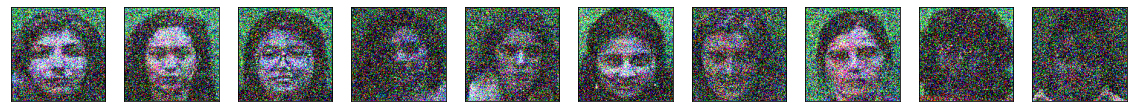

In [9]:
noise_factor = 0.5
x_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)


n = 10
plt.figure(figsize=(20,2))
for i in range(1,n+1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_train_noisy[i].reshape(128,128,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.savefig('ordata101.png')

In [10]:
input_img = Input(shape=(128,128,3))
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Flatten()(x)
encoded = Dense(100, activation='relu')(x)
x = Dense(32*32*3)(x)
x = Reshape((32,32,3))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)
encoder = Model(input_img,encoded)
autoencoder = Model(input_img, decoded)
autoencoder.summary()
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 64, 64, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 3072)              1006

In [11]:
history = autoencoder.fit(x_train_noisy, X_train, epochs=100, batch_size=128, shuffle=True, validation_split=0.2)

Train on 2455 samples, validate on 614 samples
Epoch 1/100
2455/2455 [==============================] - 11s 5ms/step - loss: 0.6256 - val_loss: 0.6040
Epoch 2/100
2455/2455 [==============================] - 8s 3ms/step - loss: 0.5822 - val_loss: 0.5788
Epoch 3/100
2455/2455 [==============================] - 8s 3ms/step - loss: 0.5602 - val_loss: 0.5633
Epoch 4/100
2455/2455 [==============================] - 8s 3ms/step - loss: 0.5434 - val_loss: 0.5566
Epoch 5/100
2455/2455 [==============================] - 8s 3ms/step - loss: 0.5360 - val_loss: 0.5537
Epoch 6/100
2455/2455 [==============================] - 8s 3ms/step - loss: 0.5322 - val_loss: 0.5517
Epoch 7/100
2455/2455 [==============================] - 8s 3ms/step - loss: 0.5297 - val_loss: 0.5514
Epoch 8/100
2455/2455 [==============================] - 8s 3ms/step - loss: 0.5274 - val_loss: 0.5493
Epoch 9/100
2455/2455 [==============================] - 8s 3ms/step - loss: 0.5255 - val_loss: 0.5486
Epoch 10/100
2455/2455 [=

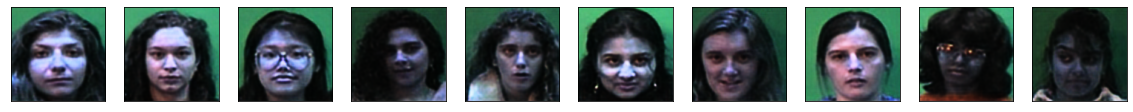

In [13]:
n = 10
plt.figure(figsize=(20,2))
x_test_output = autoencoder.predict(x_train_noisy)
for i in range(1,n+1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_output[i].reshape(128,128,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.savefig('image11.png')

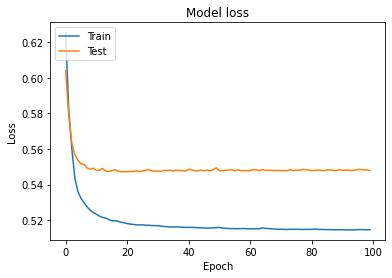

In [15]:
%matplotlib inline

import matplotlib.pyplot as plt


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [21]:
encoded_pred = encoder.predict(x_train_noisy)
print(encoded_pred.shape)
print(labels)
import csv
with open('Autoencoder_final.csv','w+') as fd:
  for i in range(3000):
    for j in encoded_pred[i]:
      fd.write(str(j))
      fd.write(",") 
    fd.write(str(labels[i])+";\n")

(3069, 100)
['female', 'male', 'malestaff', 'female', 'male', 'malestaff', 'female', 'male', 'malestaff', 'female', 'male', 'malestaff', 'female', 'male', 'malestaff', 'female', 'male', 'malestaff', 'female', 'male', 'malestaff', 'female', 'male', 'malestaff', 'female', 'male', 'malestaff', 'female', 'male', 'malestaff', 'female', 'male', 'malestaff', 'female', 'male', 'malestaff', 'female', 'male', 'malestaff', 'female', 'male', 'malestaff', 'female', 'male', 'malestaff', 'female', 'male', 'malestaff', 'female', 'male', 'malestaff', 'female', 'male', 'malestaff', 'female', 'male', 'malestaff', 'female', 'male', 'malestaff', 'female', 'male', 'malestaff', 'female', 'male', 'malestaff', 'female', 'male', 'malestaff', 'female', 'male', 'malestaff', 'female', 'male', 'malestaff', 'female', 'male', 'malestaff', 'female', 'male', 'malestaff', 'female', 'male', 'malestaff', 'female', 'male', 'malestaff', 'female', 'male', 'malestaff', 'female', 'male', 'malestaff', 'female', 'male', 'malesta